# Check h5ad objects

### Load packages  

In [2]:
# Generic
import pandas as pd
import numpy as np

# single cell
import scanpy as sc
import squidpy as sq
import anndata as ad

### Load and concatenate data

In [3]:
folder = '/lustre/groups/ml01/workspace/sara.jimenez/spatial_pancreas_data/preprocessed_data/data4downstream/'
files   = ['s1_covet_niche_def_corr_per_fov.h5ad','s2_covet_niche_def_corr_per_fov.h5ad','s3_covet_niche_def_corr_per_fov.h5ad']

s1 = sc.read_h5ad(folder+files[0])
s2 = sc.read_h5ad(folder+files[1])
s3 = sc.read_h5ad(folder+files[2])

adata = ad.concat([s1, s2, s3], join='outer',uns_merge='same',axis=0,pairwise=True) 

del s1 
del s2
del s3

adata.obs_names_make_unique()
adata

/home/aih/sara.jimenez/miniconda3/envs/liana/lib/python3.9/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


AnnData object with n_obs × n_vars = 386727 × 979
    obs: 'fov', 'Area', 'AspectRatio', 'CenterX_global_px', 'CenterY_global_px', 'Width', 'Height', 'Mean.MembraneStain', 'Max.MembraneStain', 'Mean.PanCK', 'Max.PanCK', 'Mean.GCG', 'Max.GCG', 'Mean.CD3', 'Max.CD3', 'Mean.DAPI', 'Max.DAPI', 'cell_ID', 'condition', 'slide', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_NegPrb', 'log1p_total_counts_NegPrb', 'pct_counts_NegPrb', 'n_genes', 'cell_type_coarse', 'CellTypes_max', 'donor', 'cell_type', 'leiden_covet_0.2', 'Niche_label'
    uns: 'CellTypes_max_colors', 'Niche_label_colors', 'cell_type_coarse_colors', 'hvg', 'leiden_covet_0.2', 'n_neighbors=30', 'neighbors', 'pca', 'spatial'
    obsm: 'X_pca', 'X_umap', 'covet-n_neighbors=30', 'covet_sqrt-n_neighbors=30', 'covet_sqrt_flat-n_neighbors=30', 'spatial', 'spati

In [4]:
adata.X.max(),adata.layers['counts'].max()

(122.07407, 325)

The data is already normalized.   
- ```adata.X``` has the normalized counts and  
- ```adata.layers['counts']``` the raw counts

### Create unique fov to avoid duplicates from different slides

In [5]:
adata.obs['fov_unique'] = adata.obs.fov.astype(str) + '_' + adata.obs.slide.astype(str)
adata.obs.fov_unique.unique()

array(['1_Run5211_S1', '2_Run5211_S1', '3_Run5211_S1', '4_Run5211_S1',
       '5_Run5211_S1', '6_Run5211_S1', '7_Run5211_S1', '8_Run5211_S1',
       '9_Run5211_S1', '10_Run5211_S1', '11_Run5211_S1', '12_Run5211_S1',
       '13_Run5211_S1', '14_Run5211_S1', '15_Run5211_S1', '16_Run5211_S1',
       '17_Run5211_S1', '18_Run5211_S1', '19_Run5211_S1', '20_Run5211_S1',
       '21_Run5211_S1', '22_Run5211_S1', '23_Run5211_S1', '24_Run5211_S1',
       '1_Run5211_S2', '2_Run5211_S2', '3_Run5211_S2', '4_Run5211_S2',
       '5_Run5211_S2', '6_Run5211_S2', '7_Run5211_S2', '8_Run5211_S2',
       '9_Run5211_S2', '10_Run5211_S2', '11_Run5211_S2', '12_Run5211_S2',
       '13_Run5211_S2', '14_Run5211_S2', '15_Run5211_S2', '16_Run5211_S2',
       '17_Run5211_S2', '18_Run5211_S2', '19_Run5211_S2', '20_Run5211_S2',
       '21_Run5211_S2', '22_Run5211_S2', '1_Run5211_S3', '2_Run5211_S3',
       '3_Run5211_S3', '4_Run5211_S3', '5_Run5211_S3', '6_Run5211_S3',
       '7_Run5211_S3', '8_Run5211_S3', '9_Run5211

In [6]:
adata.obs['fov_unique'] = adata.obs['fov_unique'].astype('category')

In [14]:
adata

AnnData object with n_obs × n_vars = 386727 × 979
    obs: 'fov', 'Area', 'AspectRatio', 'CenterX_global_px', 'CenterY_global_px', 'Width', 'Height', 'Mean.MembraneStain', 'Max.MembraneStain', 'Mean.PanCK', 'Max.PanCK', 'Mean.GCG', 'Max.GCG', 'Mean.CD3', 'Max.CD3', 'Mean.DAPI', 'Max.DAPI', 'cell_ID', 'condition', 'slide', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_NegPrb', 'log1p_total_counts_NegPrb', 'pct_counts_NegPrb', 'n_genes', 'cell_type_coarse', 'CellTypes_max', 'donor', 'Niche_label', 'fov_unique'
    uns: 'CellTypes_max_colors', 'Niche_label_colors', 'cell_type_coarse_colors', 'hvg', 'n_neighbors=30', 'neighbors', 'pca', 'spatial'
    obsm: 'X_pca', 'X_umap', 'covet-n_neighbors=30', 'covet_sqrt-n_neighbors=30', 'covet_sqrt_flat-n_neighbors=30', 'spatial', 'spatial_fov'
    layers: 'counts', 'log'
   

/home/aih/sara.jimenez/miniconda3/envs/liana/lib/python3.9/site-packages/squidpy/pl/_color_utils.py:28: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.


/home/aih/sara.jimenez/miniconda3/envs/liana/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:946: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
/home/aih/sara.jimenez/miniconda3/envs/liana/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:946: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
/home/aih/sara.jimenez/miniconda3/envs/liana/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:946: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored


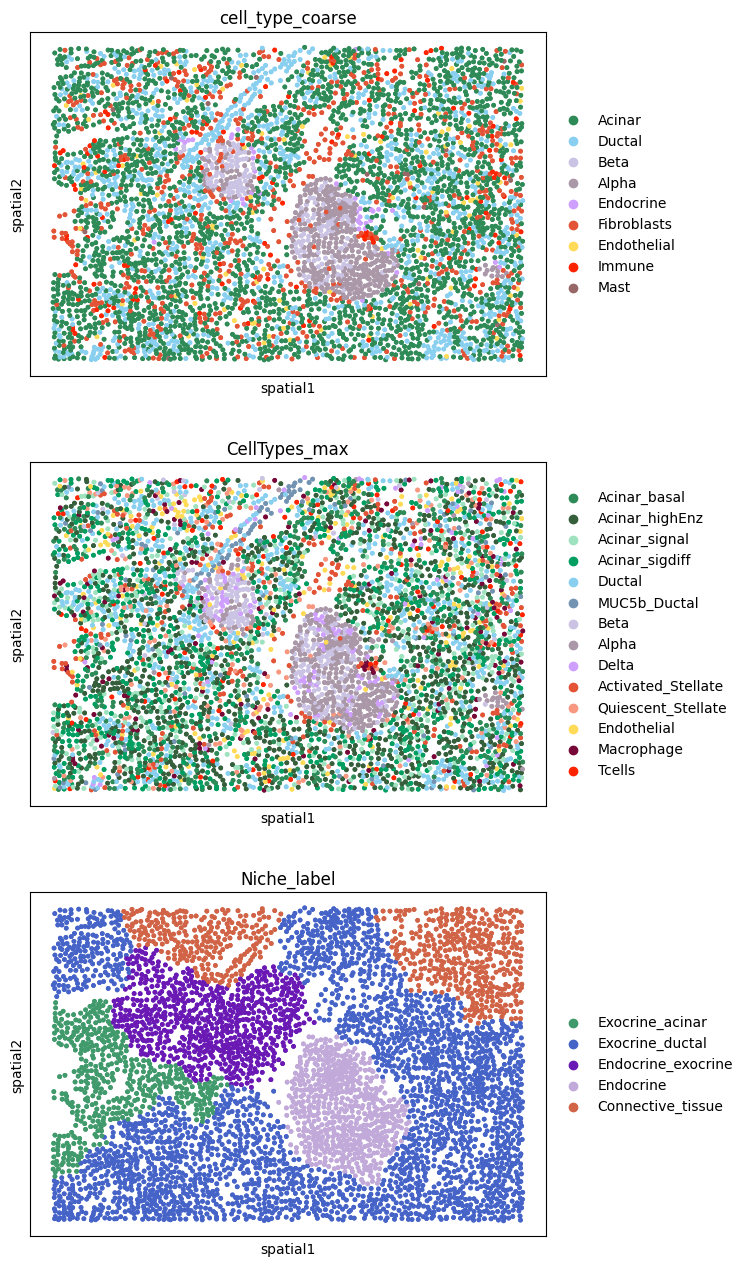

In [12]:
# Check how the TF activities look like
sq.pl.spatial_scatter(
    adata[adata.obs['fov_unique'] == '12_Run5211_S1'],
    color = ['cell_type_coarse','CellTypes_max','Niche_label'],
    spatial_key = 'spatial',
    shape=None,
    ncols=1,
)

In [15]:
adata.write('/lustre/groups/ml01/workspace/sara.jimenez/spatial_pancreas_data/preprocessed_data/data4downstream/spatial_pancreas_all_slides_celltype_niche_ann.h5ad')

In [20]:
adata

AnnData object with n_obs × n_vars = 386727 × 979
    obs: 'fov', 'Area', 'AspectRatio', 'CenterX_global_px', 'CenterY_global_px', 'Width', 'Height', 'Mean.MembraneStain', 'Max.MembraneStain', 'Mean.PanCK', 'Max.PanCK', 'Mean.GCG', 'Max.GCG', 'Mean.CD3', 'Max.CD3', 'Mean.DAPI', 'Max.DAPI', 'cell_ID', 'condition', 'slide', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_NegPrb', 'log1p_total_counts_NegPrb', 'pct_counts_NegPrb', 'n_genes', 'cell_type_coarse', 'CellTypes_max', 'donor', 'Niche_label', 'fov_unique'
    uns: 'CellTypes_max_colors', 'Niche_label_colors', 'cell_type_coarse_colors', 'hvg', 'n_neighbors=30', 'neighbors', 'pca', 'spatial'
    obsm: 'X_pca', 'X_umap', 'covet-n_neighbors=30', 'covet_sqrt-n_neighbors=30', 'covet_sqrt_flat-n_neighbors=30', 'spatial', 'spatial_fov'
    layers: 'counts', 'log'
   

In [17]:
acts = sc.read_h5ad(folder+'TF_activities_all_slides.h5ad')
acts

/home/aih/sara.jimenez/miniconda3/envs/liana/lib/python3.9/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


AnnData object with n_obs × n_vars = 368788 × 366
    obs: 'fov', 'Area', 'AspectRatio', 'CenterX_global_px', 'CenterY_global_px', 'Width', 'Height', 'Mean.MembraneStain', 'Max.MembraneStain', 'Mean.PanCK', 'Max.PanCK', 'Mean.GCG', 'Max.GCG', 'Mean.CD3', 'Max.CD3', 'Mean.DAPI', 'Max.DAPI', 'cell_ID', 'condition', 'slide', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_NegPrb', 'log1p_total_counts_NegPrb', 'pct_counts_NegPrb', 'n_genes', 'cell_type_coarse', 'CellTypes_max', 'donor', 'cell_type', 'leiden_covet_0.2', 'Niche_label', 'fov_unique'
    uns: 'CellTypes_max_colors', 'Niche_label_colors', 'hvg', 'leiden_covet_0.2', 'n_neighbors=30', 'neighbors', 'pca', 'spatial', 'spatial_neighbors'
    obsm: 'X_pca', 'X_umap', 'covet-n_neighbors=30', 'covet_sqrt-n_neighbors=30', 'covet_sqrt_flat-n_neighbors=30', 'spatial'

In [18]:
acts.obsm['ulm_estimate']

ATF2      ATF3      ATF4      ATF6      ATF7     BACH1     BACH2  \
2_1      1.633162  0.368275  2.388093  3.845556  4.029484  3.991682  4.224088   
6_1      1.453308  0.327299  2.740762  2.991221  2.971398  2.977900  3.881371   
18_1     1.405182  0.223622  2.856695  3.699241  3.225034  3.425541  3.960020   
32_1     1.118131 -0.036393  2.766297  3.255627  2.984873  2.799522  3.128869   
38_1     0.950191  0.015461  2.781812  3.703745  3.261435  3.000911  3.527911   
...           ...       ...       ...       ...       ...       ...       ...   
7142_25  0.014180  0.016849  1.829817  2.230796  1.731279  1.438727  2.970258   
7152_25  1.354677  1.098383  1.013804  2.569409  1.109205  2.364858  3.569725   
7177_25  0.875717  0.563313  0.567945  1.932006  1.650165  1.771126  3.600361   
7181_25  0.440863  0.578533  1.456350  2.276029  1.612232  1.871422  3.415138   
7216_25  1.548845  0.523481  0.755702  1.501472  0.311142  2.126840  3.305791   

             BCL6   BHLHA15   BHLHE40  ...  FEV  INSM1  NEUROD1  PAX3  PAX6  \
2_1      3.347289  2.142576  1.133380  ...  NaN    NaN      NaN   NaN   NaN   
6_1      3.956723  2.193154  0.192815  ...  NaN    NaN      NaN   NaN   NaN   
18_1     4.103776  1.785574  0.463282  ...  NaN    NaN      NaN   NaN   NaN   
32_1     3.749586  1.567907 -0.341091  ...  NaN    NaN      NaN   NaN   NaN   
38_1     3.912875  1.519600  0.332130  ...  NaN    NaN      NaN   NaN   NaN   
...           ...       ...       ...  ...  ...    ...      ...   ...   ...   
7142_25  3.809186 -0.043943 -0.056794  ...  NaN    NaN      NaN   NaN   NaN   
7152_25  2.837315  0.305394  1.432173  ...  NaN    NaN      NaN   NaN   NaN   
7177_25  3.801169 -0.106493  0.635961  ...  NaN    NaN      NaN   NaN   NaN   
7181_25  3.653564 -0.292245 -0.084719  ...  NaN    NaN      NaN   NaN   NaN   
7216_25  3.039864  0.156422  0.486958  ...  NaN    NaN      NaN   NaN   NaN   

         PROP1  SOX12  MAFA  RXRG  SCRT1  
2_1        NaN    NaN   NaN   NaN    NaN  
6_1        NaN    NaN   NaN   NaN    NaN  
18_1       NaN    NaN   NaN   NaN    NaN  
32_1       NaN    NaN   NaN   NaN    NaN  
38_1       NaN    NaN   NaN   NaN    NaN  
...        ...    ...   ...   ...    ...  
7142_25    NaN    NaN   NaN   NaN    NaN  
7152_25    NaN    NaN   NaN   NaN    NaN  
7177_25    NaN    NaN   NaN   NaN    NaN  
7181_25    NaN    NaN   NaN   NaN    NaN  
7216_25    NaN    NaN   NaN   NaN    NaN  

[368788 rows x 366 columns]

In [1]:
path = sc.read_h5ad(folder+'pathway_activities_all_slides.h5ad')
path

NameError: name 'sc' is not defined

In [ ]:
ccc = sc.read_h5ad(folder+'spacedm_ccc_all_slides.h5ad')
ccc 

In [23]:
len(acts.obs.fov_unique.cat.categories)

71

In [24]:
sq.tl.var_by_distance(
    adata=acts,
    groups="Endocrine",
    cluster_key="Niche_label",
    library_key="fov_unique",
    covariates=["condition", "donor"],
)

In [25]:
acts.obsm["design_matrix"]

Niche_label    fov_unique  Endocrine  Endocrine_raw condition  \
1_1      Exocrine_ductal  1_Run5211_S1   0.057648     311.088412       T1D   
2_1            Endocrine  1_Run5211_S1        NaN       0.000000       T1D   
3_1            Endocrine  1_Run5211_S1        NaN       0.000000       T1D   
4_1      Exocrine_ductal  1_Run5211_S1   0.028918     156.051274       T1D   
5_1      Exocrine_ductal  1_Run5211_S1   0.043420     234.307490       T1D   
...                  ...           ...        ...            ...       ...   
7236_25              NaN           NaN        NaN            NaN       T1D   
7237_25              NaN           NaN        NaN            NaN       T1D   
7239_25              NaN           NaN        NaN            NaN       T1D   
7240_25              NaN           NaN        NaN            NaN       T1D   
7241_25              NaN           NaN        NaN            NaN       T1D   

                  donor  
1_1      Run5211_S1_T1D  
2_1      Run5211_S1_T1D  
3_1      Run5211_S1_T1D  
4_1      Run5211_S1_T1D  
5_1      Run5211_S1_T1D  
...                 ...  
7236_25  Run5211_S3_T1D  
7237_25  Run5211_S3_T1D  
7239_25  Run5211_S3_T1D  
7240_25  Run5211_S3_T1D  
7241_25  Run5211_S3_T1D  

[386727 rows x 6 columns]

In [26]:
acts.var_names

Index(['Androgen', 'EGFR', 'Estrogen', 'Hypoxia', 'JAK-STAT', 'MAPK', 'NFkB',
       'PI3K', 'TGFb', 'TNFa', 'Trail', 'VEGF', 'WNT', 'p53'],
      dtype='object')

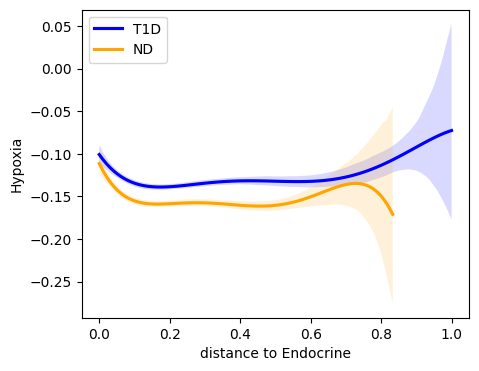

In [27]:
sq.pl.var_by_distance(
    adata=acts,
    design_matrix_key="design_matrix",
    var="Hypoxia",
    anchor_key="Endocrine",
    covariate="condition",
    line_palette=["blue", "orange"],
    show_scatter=False,
    figsize=(5, 4),
)

In [39]:
acts_nd = acts[acts.obs['fov_unique'] == '12_Run5211_S1'].copy()
acts_t1 = acts[acts.obs['fov_unique'] == '2_Run5211_S1'].copy()

In [40]:
sq.tl.var_by_distance(
    adata=acts_nd,
    groups="Beta",
    cluster_key="CellTypes_max",
    library_key="fov_unique",
    covariates=["Niche_label"],
)

sq.tl.var_by_distance(
    adata=acts_t1,
    groups="Beta",
    cluster_key="CellTypes_max",
    library_key="fov_unique",
    covariates=["Niche_label"],
)

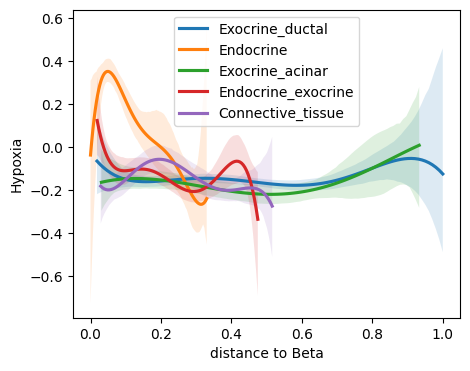

In [32]:
sq.pl.var_by_distance(
    adata=acts_nd,
    design_matrix_key="design_matrix",
    var="Hypoxia",
    anchor_key="Beta",
    covariate="Niche_label",
    #line_palette=["blue", "orange"],
    show_scatter=False,
    figsize=(5, 4),
)

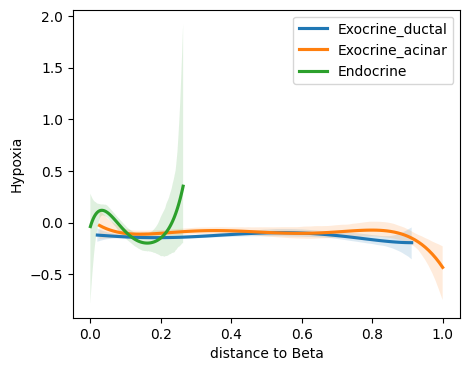

In [41]:
sq.pl.var_by_distance(
    adata=acts_t1,
    design_matrix_key="design_matrix",
    var="Hypoxia",
    anchor_key="Beta",
    covariate="Niche_label",
    #line_palette=["blue", "orange"],
    show_scatter=False,
    figsize=(5, 4),
)

/home/aih/sara.jimenez/miniconda3/envs/liana/lib/python3.9/site-packages/squidpy/pl/_color_utils.py:28: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
/home/aih/sara.jimenez/miniconda3/envs/liana/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:946: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored


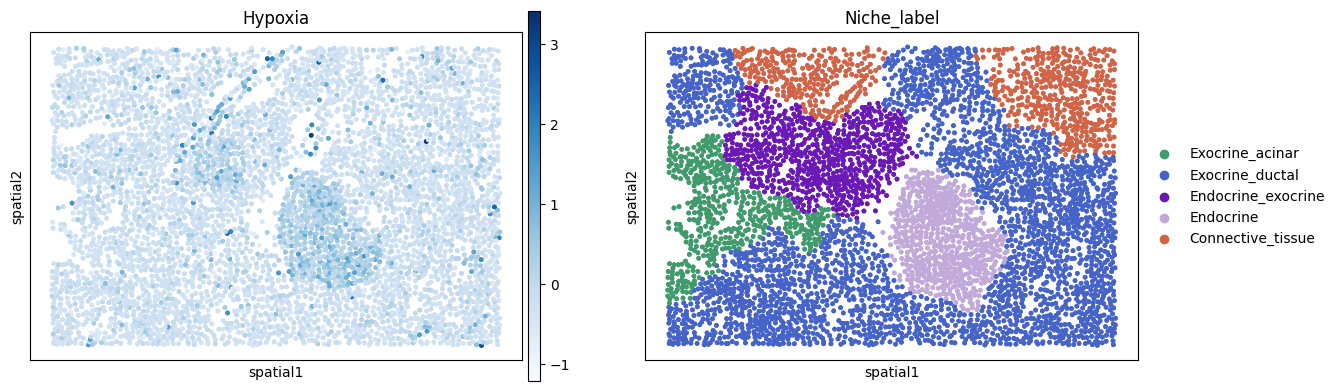

In [34]:
# Check how the TF activities look like
sq.pl.spatial_scatter(
    acts[acts.obs['fov_unique'] == '12_Run5211_S1'],
    color = ['Hypoxia', 'Niche_label'],
    #groups = ['Endocrine'],
    spatial_key = 'spatial',
    shape=None,
    cmap='Blues',
    ncols=6,
    #vmax="p99",
)

/home/aih/sara.jimenez/miniconda3/envs/liana/lib/python3.9/site-packages/squidpy/pl/_color_utils.py:28: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
/home/aih/sara.jimenez/miniconda3/envs/liana/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:946: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored


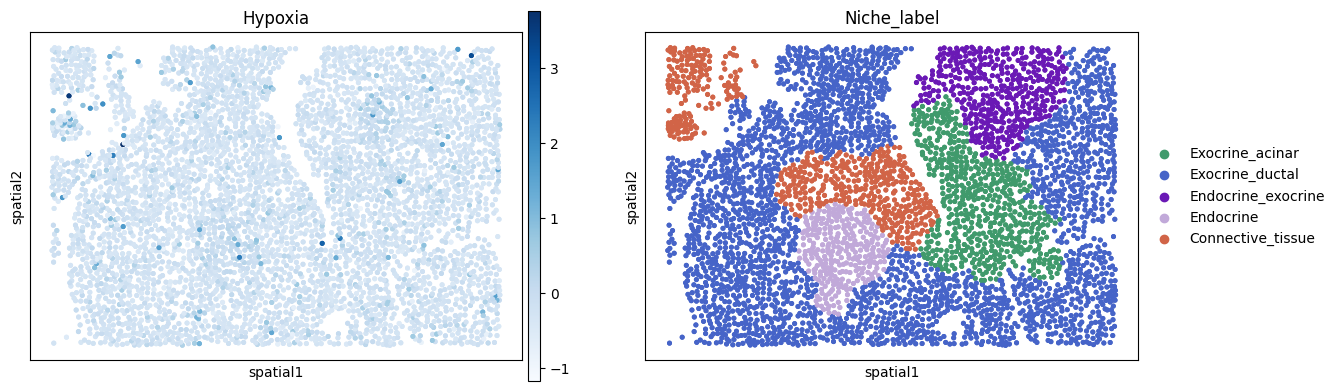

In [35]:
# Check how the TF activities look like
sq.pl.spatial_scatter(
    acts[acts.obs['fov_unique'] == '10_Run5211_S1'],
    color = ['Hypoxia', 'Niche_label'],
    #groups = ['Endocrine'],
    spatial_key = 'spatial',
    shape=None,
    cmap='Blues',
    ncols=6,
    #vmax="p99",
)

In [112]:
msigdb = dc.get_resource('MSigDB')
msigdb

genesymbol                          collection  \
0             MAFF  chemical_and_genetic_perturbations   
1             MAFF  chemical_and_genetic_perturbations   
2             MAFF  chemical_and_genetic_perturbations   
3             MAFF                         immunesigdb   
4             MAFF  chemical_and_genetic_perturbations   
...            ...                                 ...   
3838543   PRAMEF22               go_biological_process   
3838544   PRAMEF22               go_biological_process   
3838545   PRAMEF22               go_biological_process   
3838546   PRAMEF22               go_biological_process   
3838547   PRAMEF22               go_biological_process   

                                                   geneset  
0                     BOYAULT_LIVER_CANCER_SUBCLASS_G56_DN  
1                                       ELVIDGE_HYPOXIA_UP  
2                                 NUYTTEN_NIPP1_TARGETS_DN  
3                GSE17721_POLYIC_VS_GARDIQUIMOD_4H_BMDC_DN  
4                   SCHAEFFER_PROSTATE_DEVELOPMENT_12HR_UP  
...                                                    ...  
3838543  GOBP_POSITIVE_REGULATION_OF_CELL_POPULATION_PR...  
3838544                             GOBP_APOPTOTIC_PROCESS  
3838545                      GOBP_REGULATION_OF_CELL_DEATH  
3838546  GOBP_NEGATIVE_REGULATION_OF_DEVELOPMENTAL_PROCESS  
3838547             GOBP_NEGATIVE_REGULATION_OF_CELL_DEATH  

[3838548 rows x 3 columns]

In [88]:
msigdb['collection'].cat.categories

Index(['biocarta_pathways', 'cancer_gene_neighborhoods', 'cancer_modules',
       'cell_type_signatures', 'chemical_and_genetic_perturbations',
       'go_biological_process', 'go_cellular_component',
       'go_molecular_function', 'hallmark', 'human_phenotype_ontology',
       'immunesigdb', 'kegg_pathways', 'mirna_targets_legacy',
       'mirna_targets_mirdb', 'oncogenic_signatures', 'pid_pathways',
       'positional', 'reactome_pathways', 'tf_targets_gtrf',
       'tf_targets_legacy', 'vaccine_response', 'wikipathways'],
      dtype='string')

In [113]:
msigdb = msigdb[msigdb['collection']=='reactome_pathways']
msigdb

genesymbol         collection  \
200           MAFF  reactome_pathways   
342           MAFF  reactome_pathways   
718           IER3  reactome_pathways   
859           IER3  reactome_pathways   
1104        PHLDA1  reactome_pathways   
...            ...                ...   
3838483    KIR2DS2  reactome_pathways   
3838489    KIR2DS2  reactome_pathways   
3838499    KIR2DS2  reactome_pathways   
3838530    KIR3DS1  reactome_pathways   
3838532    KIR3DS1  reactome_pathways   

                                                   geneset  
200                                    REACTOME_HEMOSTASIS  
342      REACTOME_FACTORS_INVOLVED_IN_MEGAKARYOCYTE_DEV...  
718      REACTOME_INTRACELLULAR_SIGNALING_BY_SECOND_MES...  
859      REACTOME_NEGATIVE_REGULATION_OF_THE_PI3K_AKT_N...  
1104                       REACTOME_MITOTIC_G2_G2_M_PHASES  
...                                                    ...  
3838483                        REACTOME_DAP12_INTERACTIONS  
3838489                      REACTOME_INNATE_IMMUNE_SYSTEM  
3838499                    REACTOME_ADAPTIVE_IMMUNE_SYSTEM  
3838530                        REACTOME_DAP12_INTERACTIONS  
3838532                      REACTOME_INNATE_IMMUNE_SYSTEM  

[90674 rows x 3 columns]

In [114]:
# Filter by hallmark
msigdb = msigdb[msigdb['collection']=='reactome_pathways']

# Remove duplicated entries
msigdb = msigdb[~msigdb.duplicated(['geneset', 'genesymbol'])]

# Rename
msigdb.loc[:, 'geneset'] = [name.split('REACTOME_')[1] for name in msigdb['geneset']]

msigdb

IndexError: list index out of range

#### Enrichment with Over Representation analysis (ORA)

In [92]:
dc.run_ora(
    mat=adata,
    net=msigdb,
    source='geneset',
    target='genesymbol',
    verbose=True,
    use_raw=False
)

# Store in a different key
adata.obsm['msigdb_ora_estimate'] = adata.obsm['ora_estimate'].copy()
adata.obsm['msigdb_ora_pvals'] = adata.obsm['ora_pvals'].copy()

Running ora on mat with 386727 samples and 979 targets for 88 sources.



100%|██████████| 386727/386727 [01:10<00:00, 5454.42it/s]


In [93]:
adata.obsm['msigdb_ora_estimate']

source   ACUTE_MYELOID_LEUKEMIA  ADHERENS_JUNCTION  \
1_1                   -0.000000           1.319679   
2_1                   -0.000000           2.964089   
3_1                    1.503136           4.815326   
4_1                   -0.000000          -0.000000   
5_1                    1.503136           1.319679   
...                         ...                ...   
7236_25               -0.000000           1.319679   
7237_25                1.503136           1.319679   
7239_25                3.345991           1.319679   
7240_25                1.503136           2.964089   
7241_25               -0.000000          -0.000000   

source   ADIPOCYTOKINE_SIGNALING_PATHWAY  \
1_1                            -0.000000   
2_1                             1.341438   
3_1                             3.009167   
4_1                             1.341438   
5_1                            -0.000000   
...                                  ...   
7236_25                        -0.000000   
7237_25                        -0.000000   
7239_25                        -0.000000   
7240_25                        -0.000000   
7241_25                         1.341438   

source   ALDOSTERONE_REGULATED_SODIUM_REABSORPTION  ALLOGRAFT_REJECTION  \
1_1                                       1.913949             2.735032   
2_1                                       4.232644             1.208840   
3_1                                       1.913949             1.208840   
4_1                                       4.232644            -0.000000   
5_1                                       1.913949             1.208840   
...                                            ...                  ...   
7236_25                                  -0.000000             1.208840   
7237_25                                  -0.000000             1.208840   
7239_25                                  -0.000000             1.208840   
7240_25                                  -0.000000             1.208840   
7241_25                                  -0.000000             1.208840   

source   ALZHEIMERS_DISEASE  AMYOTROPHIC_LATERAL_SCLEROSIS_ALS  \
1_1               -0.000000                          -0.000000   
2_1               -0.000000                           1.471470   
3_1                1.574648                           3.279724   
4_1               -0.000000                           1.471470   
5_1                1.574648                          -0.000000   
...                     ...                                ...   
7236_25           -0.000000                          -0.000000   
7237_25           -0.000000                          -0.000000   
7239_25           -0.000000                          -0.000000   
7240_25           -0.000000                          -0.000000   
7241_25           -0.000000                          -0.000000   

source   ANTIGEN_PROCESSING_AND_PRESENTATION  APOPTOSIS  \
1_1                                 2.841759  -0.000000   
2_1                                 2.841759   6.271412   
3_1                                 2.841759   4.411346   
4_1                                 1.260535   2.702286   
5_1                                 4.626259  -0.000000   
...                                      ...        ...   
7236_25                             2.841759  -0.000000   
7237_25                             2.841759  -0.000000   
7239_25                             2.841759   1.192967   
7240_25                             2.841759  -0.000000   
7241_25                             2.841759  -0.000000   

source   ARACHIDONIC_ACID_METABOLISM  ...  THYROID_CANCER  TIGHT_JUNCTION  \
1_1                        -0.000000  ...       -0.000000        1.660758   
2_1                         1.660758  ...       -0.000000       -0.000000   
3_1                        -0.000000  ...        1.660758        1.660758   
4_1                        -0.000000  ...       -0.000000       -0.000000   
5_1                        -0.0000

In [99]:
adata.obsm['msigdb_ora_pvals']

source   ACUTE_MYELOID_LEUKEMIA  ADHERENS_JUNCTION  \
1_1                    1.000000           0.047898   
2_1                    1.000000           0.001086   
3_1                    0.031395           0.000015   
4_1                    1.000000           1.000000   
5_1                    0.031395           0.047898   
...                         ...                ...   
7236_25                1.000000           0.047898   
7237_25                0.031395           0.047898   
7239_25                0.000451           0.047898   
7240_25                0.031395           0.001086   
7241_25                1.000000           1.000000   

source   ADIPOCYTOKINE_SIGNALING_PATHWAY  \
1_1                             1.000000   
2_1                             0.045558   
3_1                             0.000979   
4_1                             0.045558   
5_1                             1.000000   
...                                  ...   
7236_25                         1.000000   
7237_25                         1.000000   
7239_25                         1.000000   
7240_25                         1.000000   
7241_25                         0.045558   

source   ALDOSTERONE_REGULATED_SODIUM_REABSORPTION  ALLOGRAFT_REJECTION  \
1_1                                       0.012191             0.001841   
2_1                                       0.000059             0.061824   
3_1                                       0.012191             0.061824   
4_1                                       0.000059             1.000000   
5_1                                       0.012191             0.061824   
...                                            ...                  ...   
7236_25                                   1.000000             0.061824   
7237_25                                   1.000000             0.061824   
7239_25                                   1.000000             0.061824   
7240_25                                   1.000000             0.061824   
7241_25                                   1.000000             0.061824   

source   ALZHEIMERS_DISEASE  AMYOTROPHIC_LATERAL_SCLEROSIS_ALS  \
1_1                1.000000                           1.000000   
2_1                1.000000                           0.033770   
3_1                0.026629                           0.000525   
4_1                1.000000                           0.033770   
5_1                0.026629                           1.000000   
...                     ...                                ...   
7236_25            1.000000                           1.000000   
7237_25            1.000000                           1.000000   
7239_25            1.000000                           1.000000   
7240_25            1.000000                           1.000000   
7241_25            1.000000                           1.000000   

source   ANTIGEN_PROCESSING_AND_PRESENTATION     APOPTOSIS  \
1_1                                 0.001440  1.000000e+00   
2_1                                 0.001440  5.352880e-07   
3_1                                 0.001440  3.878411e-05   
4_1                                 0.054886  1.984787e-03   
5_1                                 0.000024  1.000000e+00   
...                                      ...           ...   
7236_25                             0.001440  1.000000e+00   
7237_25                             0.001440  1.000000e+00   
7239_25                             0.001440  6.412589e-02   
7240_25                             0.001440  1.000000e+00   
7241_25                             0.001440  1.000000e+00   

source   ARACHIDONIC_ACID_METABOLISM  ...  THYROID_CANCER  TIGHT_JUNCTION  \
1_1                         1.000000  ...        1.000000        0.021839   
2_1                         0.021839  ...        1.000000        1.000000   
3_1                         1.000000  ...        0.021839        0.021839   
4_1                         1.000000  ...        1.000000        1.000000  

In [95]:
adata.obs_names_make_unique()

In [97]:
acts_ora = dc.get_acts(adata, obsm_key='msigdb_ora_estimate')

# We need to remove inf and set them to the maximum value observed
acts_v = acts_ora.X.ravel()
max_e = np.nanmax(acts_v[np.isfinite(acts_v)])
acts_ora.X[~np.isfinite(acts_ora.X)] = max_e

acts_ora

AnnData object with n_obs × n_vars = 386727 × 88
    obs: 'fov', 'Area', 'AspectRatio', 'CenterX_global_px', 'CenterY_global_px', 'Width', 'Height', 'Mean.MembraneStain', 'Max.MembraneStain', 'Mean.PanCK', 'Max.PanCK', 'Mean.GCG', 'Max.GCG', 'Mean.CD3', 'Max.CD3', 'Mean.DAPI', 'Max.DAPI', 'cell_ID', 'condition', 'slide', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_NegPrb', 'log1p_total_counts_NegPrb', 'pct_counts_NegPrb', 'n_genes', 'cell_type_coarse', 'CellTypes_max', 'donor', 'cell_type', 'leiden_covet_0.2', 'Niche_label', 'fov_unique'
    uns: 'CellTypes_max_colors', 'Niche_label_colors', 'cell_type_coarse_colors', 'hvg', 'leiden_covet_0.2', 'n_neighbors=30', 'neighbors', 'pca', 'spatial', 'spatial_neighbors', 'design_matrix', 'dendrogram_Niche_label', 'dendrogram_CellTypes_max'
    obsm: 'X_pca', 'X_umap',

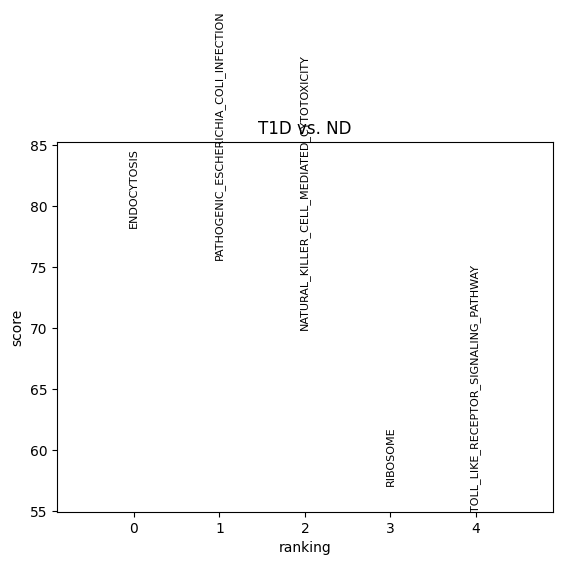

In [117]:
sc.tl.rank_genes_groups(acts_ora, "condition", groups=["T1D"], reference="ND", method="wilcoxon")
sc.pl.rank_genes_groups(acts_ora, groups=["T1D"], n_genes=5)

/home/aih/sara.jimenez/miniconda3/envs/liana/lib/python3.9/site-packages/scanpy/plotting/_tools/__init__.py:1303: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


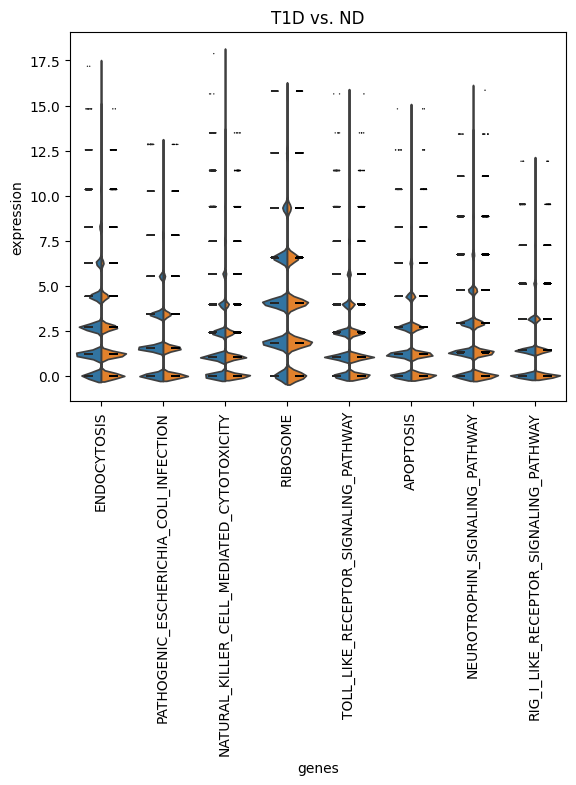

In [118]:
sc.pl.rank_genes_groups_violin(acts_ora, groups="T1D", n_genes=8)

In [101]:
acts_ora.var_names

Index(['ACUTE_MYELOID_LEUKEMIA', 'ADHERENS_JUNCTION',
       'ADIPOCYTOKINE_SIGNALING_PATHWAY',
       'ALDOSTERONE_REGULATED_SODIUM_REABSORPTION', 'ALLOGRAFT_REJECTION',
       'ALZHEIMERS_DISEASE', 'AMYOTROPHIC_LATERAL_SCLEROSIS_ALS',
       'ANTIGEN_PROCESSING_AND_PRESENTATION', 'APOPTOSIS',
       'ARACHIDONIC_ACID_METABOLISM',
       'ARRHYTHMOGENIC_RIGHT_VENTRICULAR_CARDIOMYOPATHY_ARVC', 'ASTHMA',
       'AUTOIMMUNE_THYROID_DISEASE', 'AXON_GUIDANCE', 'BASAL_CELL_CARCINOMA',
       'BLADDER_CANCER', 'B_CELL_RECEPTOR_SIGNALING_PATHWAY',
       'CALCIUM_SIGNALING_PATHWAY', 'CELL_ADHESION_MOLECULES_CAMS',
       'CELL_CYCLE', 'CHEMOKINE_SIGNALING_PATHWAY', 'CHRONIC_MYELOID_LEUKEMIA',
       'COLORECTAL_CANCER', 'COMPLEMENT_AND_COAGULATION_CASCADES',
       'CYTOKINE_CYTOKINE_RECEPTOR_INTERACTION',
       'CYTOSOLIC_DNA_SENSING_PATHWAY', 'DILATED_CARDIOMYOPATHY',
       'DORSO_VENTRAL_AXIS_FORMATION', 'ECM_RECEPTOR_INTERACTION',
       'ENDOCYTOSIS', 'ENDOMETRIAL_CANCER',
       'EPIT

In [102]:
to_plot = {
    'Alpha':'ANTIGEN_PROCESSING_AND_PRESENTATION',#increased in t1d
    'Delta':['HEDGEHOG_SIGNALING_PATHWAY','CELL_CYCLE'], #increased in t1d
    'Endothelial':['JAK_STAT_SIGNALING_PATHWAY']
    
}

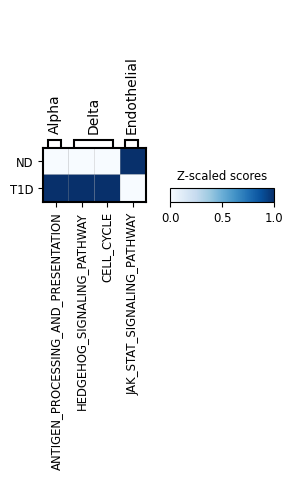

In [104]:
sc.pl.matrixplot(acts_ora, var_names=to_plot, groupby='condition', dendrogram=True, standard_scale='var',
                 colorbar_title='Z-scaled scores', cmap='Blues')

/home/aih/sara.jimenez/miniconda3/envs/liana/lib/python3.9/site-packages/squidpy/pl/_color_utils.py:28: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
/home/aih/sara.jimenez/miniconda3/envs/liana/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:946: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored


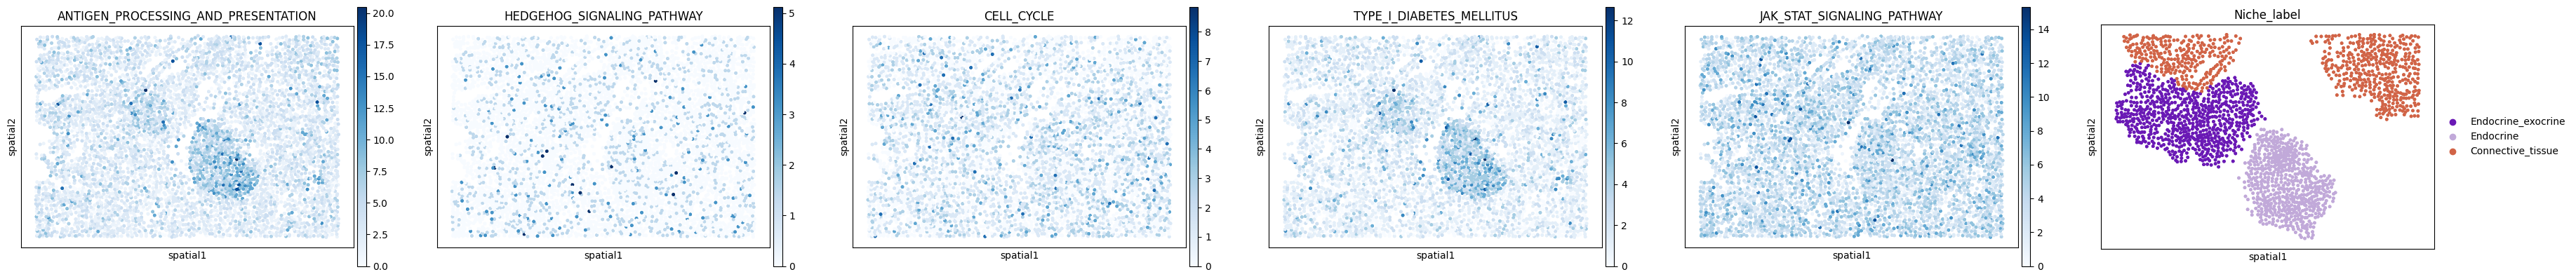

In [110]:
# Check how the TF activities look like
sq.pl.spatial_scatter(
    acts_ora[acts_ora.obs['fov_unique'] == '12_Run5211_S1'],
    color = ['ANTIGEN_PROCESSING_AND_PRESENTATION','HEDGEHOG_SIGNALING_PATHWAY','CELL_CYCLE','TYPE_I_DIABETES_MELLITUS','JAK_STAT_SIGNALING_PATHWAY','Niche_label'],
    groups = ['Endocrine','Endocrine_exocrine','Connective_tissue'],
    spatial_key = 'spatial',
    shape=None,
    cmap='Blues',
    ncols=6,
    #vmax="p99",
)

/home/aih/sara.jimenez/miniconda3/envs/liana/lib/python3.9/site-packages/squidpy/pl/_color_utils.py:28: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
/home/aih/sara.jimenez/miniconda3/envs/liana/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:946: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored


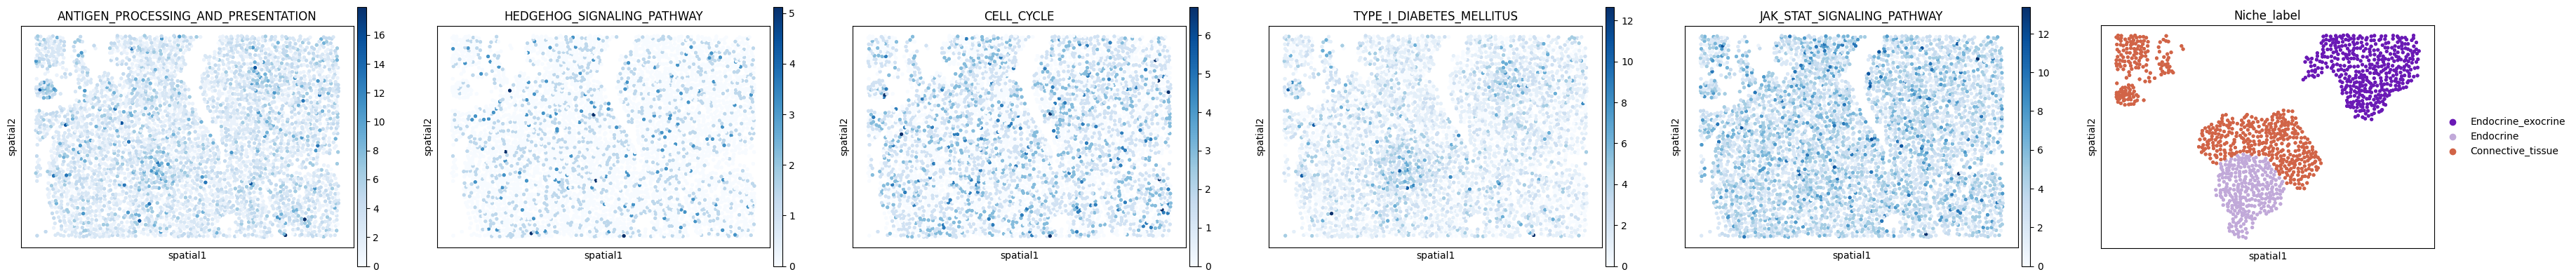

In [109]:
# Check how the TF activities look like
sq.pl.spatial_scatter(
    acts_ora[acts_ora.obs['fov_unique'] == '10_Run5211_S1'],
    color = ['ANTIGEN_PROCESSING_AND_PRESENTATION','HEDGEHOG_SIGNALING_PATHWAY','CELL_CYCLE','TYPE_I_DIABETES_MELLITUS','JAK_STAT_SIGNALING_PATHWAY','Niche_label'],
    groups = ['Endocrine','Endocrine_exocrine','Connective_tissue'],
    spatial_key = 'spatial',
    shape=None,
    cmap='Blues',
    ncols=6,
    #vmax="p99",
)